# Final Project Report

* Class: DS 5100 
* Student Name: Kevin Finn
* Student Net ID: kjf4ec
* This URL: https://github.com/kjfinn1/ds5100_montecarlo/blob/main/FinalProject.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/kjfinn1/ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

import pandas as pd \
import numpy as np

class Die:

    """A die has sides, or “faces”, and weights, and can be rolled to select a face.

    Normally, dice and coins are “fair,” meaning that the each side has an equal weight. An unfair die is one where the weights are unequal.

    Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.

    Weight defaults to 1 for each face but can be changed after the object is created.

    The weights are just numbers, not a normalized probability distribution.

    The die has one behavior, which is to be rolled one or more times."""

    def __init__(self, faces):

        """ An initializer.
        Takes a NumPy array of faces as an argument. Throws a TypeError if not a NumPy array.

        The arrays data type (dtype) may be strings or numbers.

        The arrays values must be distinct. Tests to see if the values are distinct and raises a ValueError if not.

        Internally initializes the weights to for each face.

        Saves both faces and weights in a private data frame with faces in the index."""
        
        if not isinstance(faces, list):
            raise TypeError("Dice faces must be an array")
        self.faces = pd.DataFrame({'Faces': faces})
        
        self.faces['Weights'] = 1
        
        if len(self.faces) != len(set(self.faces['Faces'])):
            raise ValueError("Each face value must be unique.")

    def weight_change(self, face_value, new_weight):

        """A method to change the weight of a single side.
        
        Takes two arguments: the face value to be changed and the new weight.

        Checks to see if the face passed is valid value, i.e. if it is in the die array. If not, raises an IndexError.

        Checks to see if the weight is a valid type, i.e. if it is numeric (integer or float) or castable as numeric. If not, raises a TypeError."""

        if face_value not in self.faces['Faces'].values:
            raise IndexError("Face value not found in the die.")
        if not np.issubdtype(type(new_weight), np.number):
            raise TypeError("Weight must be an int or float.")
        self.faces.loc[self.faces['Faces'] == face_value, 'Weights'] = new_weight

    def roll_die(self, rolls=1):

        """A method to roll the die one or more times.

            Takes a parameter of how many times the die is to be rolled; defaults to 1.

            This is essentially a random sample with replacement, from the private die data frame, that applies the weights.

            Returns a Python list of outcomes.

            Does not store internally these results."""

        results = []
        for i in range(rolls):
            result = self.faces.sample(weights=self.faces['Weights'])['Faces'].values[0]
            results.append(result)
        return pd.Series(results)

    def current_state(self):

        """A method to show the dies current state.
        
        Returns a copy of the private die data frame."""

        return self.faces
        
import pandas as pd

class Game:

    """A game consists of rolling of one or more similar dice (Die objects) one or more times.

    By similar dice, we mean that each die in a given game has the same number of sides
    
     and associated faces, but each die object may have its own weights.

    Each game is initialized with a Python list that contains one or more dice.

    Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.

    Game objects only keep the results of their most recent play."""

    def __init__(self, *die_objects):
        
        """An initializer.

    Takes a single parameter, a list of already instantiated similar dice."""

        self.die_objects = die_objects
        self.results_df = None 
        self.wide_table = None  

    def play(self, rolls=1):

        """A play method.

    Takes an integer parameter to specify how many times the dice should be rolled.

    Saves the result of the play to a private data frame.

    The data frame should be in wide format, i.e. have the roll number as a named index, 
    
    columns for each die number (using its list index as the column name), and the face rolled in that instance in each cell."""

        results = []
        for a, die_object in enumerate(self.die_objects):
            df = pd.DataFrame({'Die': f'Die {a}', 'Result': die_object.roll_die(rolls)})
            results.append(df)
        self.results_df = pd.concat(results, ignore_index=True) 

        
        self.results_df['Roll'] = self.results_df.groupby('Die').cumcount() + 1

        
        self.wide_table = self.results_df.pivot(index='Roll', columns='Die', values='Result')

        
        self.wide_table.reset_index(inplace=True)

    def results(self, narrow=False, wide=True):

        """A method to show the user the results of the most recent play.

    This method just returns a copy of the private play data frame to the user.

    Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.

    The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), 
    
    and a single column with the outcomes (i.e. the face rolled).

    This method should raise a ValueError if the user passes an invalid option for narrow or wide."""

        if narrow:
            new_order = ['Roll', 'Die', 'Result']
            self.results_df = self.results_df[new_order]
            return self.results_df
        elif wide:
            return self.wide_table
        else:
            raise ValueError("Either 'narrow' or 'wide' parameter must be specified.")
            
import pandas as pd \
import itertools \
from collections import Counter \
import numpy as np \

class Analyzer:
    """The Analyzer class

    General Definition. An Analyzer object takes the results of a single game 
  
    and computes various descriptive statistical properties about it."""

    def __init__(self, game_objects):

      """An initializer.

      Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object."""

      if not isinstance(game_objects, Game):
        raise ValueError("game_objects must be an instance of the Game class.")
      self.game_objects = game_objects
      self.wide_table = game_objects.wide_table

    def jackpot(self):
      """A jackpot method.

      A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.

      Computes how many times the game resulted in a jackpot, if an individual roll resulted in a jackpot and 
      
      the jackpots per roll at that stage of the game.

      Returns an integer for the number of jackpots."""

      table1 = self.wide_table.copy()
      table1['Jackpot'] = table1.apply(lambda row: row.drop('Roll').nunique() == 1, axis=1)

      jackpot_count = 0
      for a in range(0, len(table1.Roll)):
        if table1['Jackpot'][a]:
          jackpot_count += 1
        table1.loc[a, 'Jackpot per roll'] = jackpot_count / (a+1)
      print("Total Jackpots " + str(jackpot_count))
      return table1


    def face_counts_per_roll(self):

      """A face counts per roll method.

      Computes how many times a given face is rolled in each event.
        
      Returns a data frame of results.

      The data frame has an index of the roll number, face values as columns, 
      
      and count values in the cells (i.e. it is in wide format)."""

      roll_counts = []

      table5 = self.wide_table.drop(columns='Roll')

      for index, row in table5.iterrows():
        counts = Counter(row)
        roll_counts.append(counts)

      df = pd.DataFrame(roll_counts)
      df.index.name = 'Roll'
      df_filled = df.fillna(0)
      return df_filled


    def combo_count(self):

      """A combo count method.

      Computes the distinct combinations of faces rolled, along with their counts.

      Combinations are order-independent and may contain repetitions.

      Returns a data frame of results.

      The data frame should have an MultiIndex of distinct combinations and a column for the associated counts."""

      table2 = self.wide_table.copy()
      table2.drop(columns='Roll', inplace=True) 

      table2['Combination'] = table2.apply(lambda row: tuple(sorted(row)), axis=1)
        
      combination_counts = table2['Combination'].value_counts().reset_index()
      combination_counts.columns = ['Combination', 'Count']
        
      return combination_counts
      
    def perm_count(self):

      """An permutation count method.

      Computes the distinct permutations of faces rolled, along with their counts.

      Permutations are order-dependent and may contain repetitions.

      Returns a data frame of results.

      The data frame should have an MultiIndex of distinct permutations and a column for the associated counts."""

      table2 = self.wide_table.copy()
      table2.drop(columns='Roll', inplace=True)  # Drop the 'Die' column

      return table2.apply(lambda row: tuple(row), axis=1).value_counts()

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

import unittest \
from montecarlo import Die \
from montecarlo import Game \
from montecarlo import Analyzer \
class MonteCarloTestSuite(unittest.TestCase):  \

    def test_1_init(self):
        die_object = Die(['a', 'b'])
        self.assertEqual(type(die_object), Die)

    def test_2_weight_change(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        die_obj.weight_change('a', 2)
        self.assertTrue(die_obj.faces.Weights[0]==2)
        
    def test_3_roll_die(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        roll1 = die_obj.roll_die()
        self.assertTrue(roll1[0] == 'a' or roll1[0] == 'b' or roll1[0] == 'c' or roll1[0] == 'd' or roll1[0] == 'e' or roll1[0] == 'f')

    def test_4_current_state(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        current = die_obj.current_state()
        self.assertTrue(current['Weights'][4]==1)
        
    def test_5_init(self):
        die_object = Die(['a', 'b'])
        game_obj=Game(die_object)
        self.assertEqual(type(game_obj), Game)   

    def test_6_play(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        game_obj=Game(die_obj)
        game_obj.play()
        roll2=game_obj.wide_table['Die 0'][0]
        self.assertTrue(roll2 == 'a' or roll2 == 'b' or roll2 == 'c' or roll2 == 'd' or roll2 == 'e' or roll2 == 'f')

    def test_7_results(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        game_obj=Game(die_obj)
        game_obj.play(20)
        game_obj.results()
        roll2=game_obj.wide_table['Die 0'][19]
        self.assertTrue(roll2 == 'a' or roll2 == 'b' or roll2 == 'c' or roll2 == 'd' or roll2 == 'e' or roll2 == 'f')
        
    def test_8_init(self):
        die_object = Die(['a', 'b'])
        game_obj=Game(die_object)
        analyzer_object=Analyzer(game_obj)
        self.assertEqual(type(analyzer_object), Analyzer)   

    def test_9_jackpot(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        die_obj2 = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        game_obj=Game(die_obj, die_obj2)
        game_obj.play(20)
        analyzer_object=Analyzer(game_obj)
        self.assertTrue(analyzer_object.jackpot()['Jackpot'][5] == True or analyzer_object.jackpot()['Jackpot'][5]  == False)

    def test_10_jackpot(self):
        die_obj = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        die_obj2 = Die(['a', 'b', 'c', 'd', 'e', 'f'])
        game_obj=Game(die_obj, die_obj2)
        game_obj.play(20)
        analyzer_object=Analyzer(game_obj)
        roll3=analyzer_object.face_counts_per_roll()['a'][5]
        self.assertTrue(roll3== 1.0 or roll3 == 2.0 or roll3== 0.0)

    def test_11_combo_count(self):
        die_obj = Die(['a', 'b'])
        die_obj2 = Die(['a', 'b'])
        game_obj=Game(die_obj, die_obj2)
        game_obj.play(20)
        analyzer_object=Analyzer(game_obj)
        roll4=analyzer_object.combo_count()['Count'][0]
        self.assertTrue(roll4 >=6)
        
    def test_12_perm_count(self):
        die_obj = Die(['a', 'b'])
        die_obj2 = Die(['a', 'b'])
        game_obj=Game(die_obj, die_obj2)
        game_obj.play(20)
        analyzer_object=Analyzer(game_obj)
        roll5=analyzer_object.perm_count()[0]
        self.assertTrue(roll5 >=5)

if __name__ == '__main__':
    unittest.main()

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

(base) kevinfinn@Kevins-MacBook-Pro montecarlo % python  montecarlo_test.py \
...........Total Jackpots 6 \
. \
---------------------------------------------------------------------- \
Ran 12 tests in 0.043s \
 \
OK  \ 

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import os
os.chdir('/Users/kevinfinn/Documents/montecarlo')
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.Die)

Help on class Die in module montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  The Die class defines the dice that will be used in future games. A die has sides, or “faces”, and weights, and can be rolled to select a face.
 |  
 |  Normally, dice and coins are “fair,” meaning that the each side has an equal weight. An unfair die is one where the weights are unequal.
 |  
 |  Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.
 |  
 |  Weight defaults to 1 for each face but can be changed after the object is created.
 |  
 |  The weights are just numbers, not a normalized probability distribution.
 |  
 |  The die has one behavior, which is to be rolled one or more times.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Takes a NumPy array of faces as an argument. Throws a TypeError if not a NumPy array.
 |      
 |      The arrays data type (dtype) may be strings or numbers.
 |      
 |      The arrays values must be disti

In [3]:
help(montecarlo.Game)

Help on class Game in module montecarlo:

class Game(builtins.object)
 |  Game(*die_objects)
 |  
 |  A game consists of rolling of one or more similar dice (Die objects) one or more times.
 |  
 |  By similar dice, we mean that each die in a given game has the same number of sides
 |  
 |   and associated faces, but each die object may have its own weights.
 |  
 |  Each game is initialized with a Python list that contains one or more dice.
 |  
 |  Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
 |  
 |  Game objects only keep the results of their most recent play.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *die_objects)
 |      Takes a single parameter, a list of already instantiated similar dice.
 |  
 |  play(self, rolls=1)
 |      Takes an integer parameter to specify how many times the dice should be rolled.
 |      
 |      Saves the result of the play to a private data frame.
 |      
 |      The data frame should 

In [4]:
help(montecarlo.Analyzer)

Help on class Analyzer in module montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game_objects)
 |  
 |  General Definition. An Analyzer object takes the results of a single game 
 |  
 |  and computes various descriptive statistical properties about it.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game_objects)
 |      Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object.
 |  
 |  combo_count(self)
 |      Computes the distinct combinations of faces rolled, along with their counts.
 |      
 |      Combinations are order-independent and may contain repetitions.
 |      
 |      Returns a data frame of results.
 |      
 |      The data frame should have an MultiIndex of distinct combinations and a column for the associated counts.
 |  
 |  face_counts_per_roll(self)
 |      Computes how many times a given face is rolled in each event.
 |        
 |      Returns a data frame of results.
 |      
 |      The data fram

In [5]:
help(montecarlo.Die.__init__)

Help on function __init__ in module montecarlo:

__init__(self, faces)
    Takes a NumPy array of faces as an argument. Throws a TypeError if not a NumPy array.
    
    The arrays data type (dtype) may be strings or numbers.
    
    The arrays values must be distinct. Tests to see if the values are distinct and raises a ValueError if not.
    
    Internally initializes the weights to for each face.
    
    Saves both faces and weights in a private data frame with faces in the index.



In [6]:
help(montecarlo.Die.weight_change)

Help on function weight_change in module montecarlo:

weight_change(self, face_value, new_weight)
    A method to change the weight of a single side.
    
    Takes two arguments: the face value to be changed and the new weight.
    
    Checks to see if the face passed is valid value, i.e. if it is in the die array. If not, raises an IndexError.
    
    Checks to see if the weight is a valid type, i.e. if it is numeric (integer or float) or castable as numeric. If not, raises a TypeError.



In [7]:
help(montecarlo.Die.roll_die)

Help on function roll_die in module montecarlo:

roll_die(self, rolls=1)
    A method to roll the die one or more times.
    
    Takes a parameter of how many times the die is to be rolled; defaults to 1.
    
    This is essentially a random sample with replacement, from the private die data frame, that applies the weights.
    
    Returns a Python list of outcomes.
    
    Does not store internally these results.



In [8]:
help(montecarlo.Die.current_state)

Help on function current_state in module montecarlo:

current_state(self)
    A method to show the dies current state.
    
    Returns a copy of the private die data frame.



In [9]:
help(montecarlo.Game.__init__)

Help on function __init__ in module montecarlo:

__init__(self, *die_objects)
    Takes a single parameter, a list of already instantiated similar dice.



In [10]:
help(montecarlo.Game.play)

Help on function play in module montecarlo:

play(self, rolls=1)
    Takes an integer parameter to specify how many times the dice should be rolled.
    
    Saves the result of the play to a private data frame.
    
    The data frame should be in wide format, i.e. have the roll number as a named index, 
    
    columns for each die number (using its list index as the column name), and the face rolled in that instance in each cell.



In [11]:
help(montecarlo.Game.results)

Help on function results in module montecarlo:

results(self, narrow=False, wide=True)
    A method to show the user the results of the most recent play.
    
    This method just returns a copy of the private play data frame to the user.
    
    Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
    
    The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), 
    
    and a single column with the outcomes (i.e. the face rolled).
    
    This method should raise a ValueError if the user passes an invalid option for narrow or wide.



In [12]:
help(montecarlo.Analyzer.__init__)

Help on function __init__ in module montecarlo:

__init__(self, game_objects)
    Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object.



In [13]:
help(montecarlo.Analyzer.jackpot)

Help on function jackpot in module montecarlo:

jackpot(self)
    A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.
    
    Computes how many times the game resulted in a jackpot, if an individual roll resulted in a jackpot and 
    
    the jackpots per roll at that stage of the game.
    
    Returns an integer for the number of jackpots.



In [14]:
help(montecarlo.Analyzer.face_counts_per_roll)

Help on function face_counts_per_roll in module montecarlo:

face_counts_per_roll(self)
    Computes how many times a given face is rolled in each event.
      
    Returns a data frame of results.
    
    The data frame has an index of the roll number, face values as columns, 
    
    and count values in the cells (i.e. it is in wide format).



In [15]:
help(montecarlo.Analyzer.combo_count)

Help on function combo_count in module montecarlo:

combo_count(self)
    Computes the distinct combinations of faces rolled, along with their counts.
    
    Combinations are order-independent and may contain repetitions.
    
    Returns a data frame of results.
    
    The data frame should have an MultiIndex of distinct combinations and a column for the associated counts.



In [16]:
help(montecarlo.Analyzer.perm_count)

Help on function perm_count in module montecarlo:

perm_count(self)
    Computes the distinct permutations of faces rolled, along with their counts.
    
    Permutations are order-dependent and may contain repetitions.
    
    Returns a data frame of results.
    
    The data frame should have an MultiIndex of distinct permutations and a column for the associated counts.



## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/kjfinn1/ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

(base) kevinfinn@Kevins-MacBook-Pro montecarlo % !pip install montecarlo \
pip install pandas install montecarlo \
Requirement already satisfied: pandas in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (1.5.3) \
Requirement already satisfied: install in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (1.3.5) \
Collecting montecarlo \
  Downloading montecarlo-0.1.17.tar.gz (1.3 kB) \
  Preparing metadata (setup.py) ... done \
Requirement already satisfied: python-dateutil>=2.8.1 in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (from pandas) (2.8.2) \
Requirement already satisfied: pytz>=2020.1 in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (from pandas) (2022.7) \
Requirement already satisfied: numpy>=1.21.0 in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (from pandas) (1.23.5) \
Requirement already satisfied: six>=1.5 in /Users/kevinfinn/anaconda3/lib/python3.10/site-packages (from python-dateutil>=2.8.1->pandas) (1.16.0) \
Building wheels for collected packages: montecarlo \
  Building wheel for montecarlo (setup.py) ... done \
  Created wheel for montecarlo: filename=montecarlo-0.1.17-py3-none-any.whl size=1857 \
  sha256=a0f8d8960dac93d26d982b8de85821cacd127d59e0b8175198a96eb889af0df4 \
  Stored in directory: /Users/kevinfinn/Library/Caches/pip/wheels/9b/96/96/9ba8cf535febd42d4b6f0650941b412502cd6f6471bca1bf12 \
Successfully built montecarlo \
Installing collected packages: montecarlo \
Successfully installed montecarlo-0.1.17 \

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [17]:
test_object = montecarlo.Die(['H','T'])
test_object2 = montecarlo.Die(['H', 'T'])
test_object2.weight_change('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [18]:
test_object3=montecarlo.Game(test_object, test_object)
test_object3.play(1000)
test_object3.results()

Die,Roll,Die 0,Die 1
0,1,T,H
1,2,T,T
2,3,T,T
3,4,H,H
4,5,T,H
...,...,...,...
995,996,T,H
996,997,T,H
997,998,T,H
998,999,H,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [19]:
test_object4=montecarlo.Game(test_object2, test_object2, test_object)

In [20]:
test_object4.play(1000)
test_object4.results()

Die,Roll,Die 0,Die 1,Die 2
0,1,H,T,H
1,2,H,H,T
2,3,H,H,H
3,4,H,H,T
4,5,T,H,T
...,...,...,...,...
995,996,H,H,T
996,997,H,H,T
997,998,H,T,T
998,999,T,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [21]:
test_object3_2=montecarlo.Analyzer(test_object3)
test_object4_2=montecarlo.Analyzer(test_object4)

In [22]:
test_object3_2.jackpot()

Total Jackpots 519


Die,Roll,Die 0,Die 1,Jackpot,Jackpot per roll
0,1,T,H,False,0.000000
1,2,T,T,True,0.500000
2,3,T,T,True,0.666667
3,4,H,H,True,0.750000
4,5,T,H,False,0.600000
...,...,...,...,...,...
995,996,T,H,False,0.519076
996,997,T,H,False,0.518556
997,998,T,H,False,0.518036
998,999,H,H,True,0.518519


In [23]:
test_object4_2.jackpot()

Total Jackpots 353


Die,Roll,Die 0,Die 1,Die 2,Jackpot,Jackpot per roll
0,1,H,T,H,False,0.000000
1,2,H,H,T,False,0.000000
2,3,H,H,H,True,0.333333
3,4,H,H,T,False,0.250000
4,5,T,H,T,False,0.200000
...,...,...,...,...,...,...
995,996,H,H,T,False,0.353414
996,997,H,H,T,False,0.353059
997,998,H,T,T,False,0.352705
998,999,T,H,T,False,0.352352


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [24]:
test_object3_2.jackpot()
#Relative freq in bottom right corner of data frame

Total Jackpots 519


Die,Roll,Die 0,Die 1,Jackpot,Jackpot per roll
0,1,T,H,False,0.000000
1,2,T,T,True,0.500000
2,3,T,T,True,0.666667
3,4,H,H,True,0.750000
4,5,T,H,False,0.600000
...,...,...,...,...,...
995,996,T,H,False,0.519076
996,997,T,H,False,0.518556
997,998,T,H,False,0.518036
998,999,H,H,True,0.518519


In [25]:
test_object4_2.jackpot()
#Relative freq in bottom right corner of data frame

Total Jackpots 353


Die,Roll,Die 0,Die 1,Die 2,Jackpot,Jackpot per roll
0,1,H,T,H,False,0.000000
1,2,H,H,T,False,0.000000
2,3,H,H,H,True,0.333333
3,4,H,H,T,False,0.250000
4,5,T,H,T,False,0.200000
...,...,...,...,...,...,...
995,996,H,H,T,False,0.353414
996,997,H,H,T,False,0.353059
997,998,H,T,T,False,0.352705
998,999,T,H,T,False,0.352352


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<BarContainer object of 2 artists>

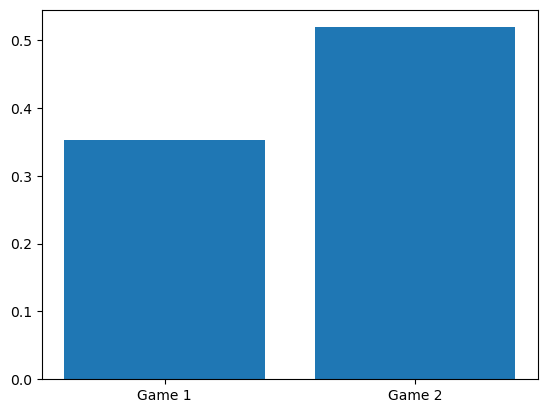

In [49]:
import matplotlib.pyplot as plt
plt.bar(['Game 1', 'Game 2'],[0.353000, 0.519000])

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [50]:
test_object = montecarlo.Die([1,2,3,4,5,6])
test_object2 = montecarlo.Die([1,2,3,4,5,6])
test_object3 = montecarlo.Die([1,2,3,4,5,6])

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [51]:
test_object3.weight_change(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [52]:
test_object2.weight_change(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [53]:
test_object_2=montecarlo.Game(test_object, test_object, test_object, test_object, test_object)
test_object_2.play(10000)
test_object_2.results()

Die,Roll,Die 0,Die 1,Die 2,Die 3,Die 4
0,1,2,5,3,5,2
1,2,1,6,6,1,5
2,3,3,6,5,3,1
3,4,5,5,3,3,1
4,5,6,6,4,1,6
...,...,...,...,...,...,...
9995,9996,1,2,5,6,2
9996,9997,2,3,4,4,5
9997,9998,1,5,6,4,6
9998,9999,6,3,1,5,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [54]:
test_object_3=montecarlo.Game(test_object2, test_object3, test_object, test_object, test_object)
test_object_3.play(10000)
test_object_3.results()

Die,Roll,Die 0,Die 1,Die 2,Die 3,Die 4
0,1,1,6,5,6,3
1,2,3,2,2,3,2
2,3,1,3,4,4,2
3,4,5,1,2,1,1
4,5,3,6,4,2,6
...,...,...,...,...,...,...
9995,9996,5,3,3,2,6
9996,9997,3,6,1,1,1
9997,9998,1,2,5,5,5
9998,9999,1,2,6,4,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [55]:
test_object_2a=montecarlo.Analyzer(test_object_2)
test_object_3a=montecarlo.Analyzer(test_object_3)

In [56]:
test_object_2a.jackpot()
#Relative freq in bottom right corner of data frame

Total Jackpots 6


Die,Roll,Die 0,Die 1,Die 2,Die 3,Die 4,Jackpot,Jackpot per roll
0,1,2,5,3,5,2,False,0.0000
1,2,1,6,6,1,5,False,0.0000
2,3,3,6,5,3,1,False,0.0000
3,4,5,5,3,3,1,False,0.0000
4,5,6,6,4,1,6,False,0.0000
...,...,...,...,...,...,...,...,...
9995,9996,1,2,5,6,2,False,0.0006
9996,9997,2,3,4,4,5,False,0.0006
9997,9998,1,5,6,4,6,False,0.0006
9998,9999,6,3,1,5,1,False,0.0006


In [57]:
test_object_3a.jackpot()
#Relative freq in bottom right corner of data frame

Total Jackpots 3


Die,Roll,Die 0,Die 1,Die 2,Die 3,Die 4,Jackpot,Jackpot per roll
0,1,1,6,5,6,3,False,0.0000
1,2,3,2,2,3,2,False,0.0000
2,3,1,3,4,4,2,False,0.0000
3,4,5,1,2,1,1,False,0.0000
4,5,3,6,4,2,6,False,0.0000
...,...,...,...,...,...,...,...,...
9995,9996,5,3,3,2,6,False,0.0003
9996,9997,3,6,1,1,1,False,0.0003
9997,9998,1,2,5,5,5,False,0.0003
9998,9999,1,2,6,4,2,False,0.0003


<BarContainer object of 2 artists>

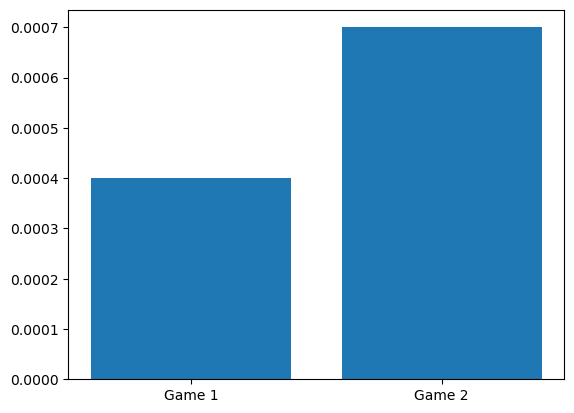

In [48]:
import matplotlib.pyplot as plt
plt.bar(['Game 1', 'Game 2'],[0.0006, 0.0003])

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [36]:
test_object = montecarlo.Die(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [37]:
test_object.weight_change('E', 529117365) 
test_object.weight_change('T', 390965105)
test_object.weight_change('A', 374061888)
test_object.weight_change('O', 326627740)
test_object.weight_change('I', 320410057)
test_object.weight_change('N', 313720540)
test_object.weight_change('S', 294300210)
test_object.weight_change('R', 277000841)
test_object.weight_change('H', 216768975)
test_object.weight_change('L', 183996130)
test_object.weight_change('D', 169330528)
test_object.weight_change('C', 138416451)
test_object.weight_change('U', 117295780)
test_object.weight_change('M', 110504544)
test_object.weight_change('F', 95422055)
test_object.weight_change('G', 91258980)
test_object.weight_change('P', 90376747)
test_object.weight_change('W', 79843664)
test_object.weight_change('Y', 75294515)
test_object.weight_change('B', 70195826)
test_object.weight_change('V', 46337161)
test_object.weight_change('K', 35373464)
test_object.weight_change('J', 9613410)
test_object.weight_change('X', 8369915)
test_object.weight_change('Z', 4975847)
test_object.weight_change('Q', 4550166)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [38]:
test_object_letters=montecarlo.Game(test_object, test_object, test_object, test_object)
test_object_letters.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [39]:
test_object_letters2=montecarlo.Analyzer(test_object_letters)
words=test_object_letters2.perm_count()

In [40]:
import pandas as pd
series = pd.Series(words)

sets_of_letters = series.index

formatted_sets = [
    ' '.join(letters_set).replace(' ', '').replace(',', '').replace('\'', '') 
    for letters_set in sets_of_letters
]
for formatted_set in formatted_sets:
    print(formatted_set)

EROE
AETA
NCAP
NEHR
SATP
CODN
NUTD
RANI
SIEB
AETI
RUEF
IESW
SRRA
LOYV
TORI
ALHA
HLRV
SVAC
TRHH
ITHS
POEN
EOAS
VYSN
EXEU
DZHR
CLAT
VOTO
LUTL
SAEP
TMDL
RDAV
PBEA
VERS
SRAV
NCOH
VLEH
GHFR
OIEA
SSRT
NJIS
NCNT
UIYI
BSTE
AESO
YCYA
OEES
HNEY
OOFL
FIOL
NCEA
OACS
HEWR
FDII
ACLI
DEHT
OEIB
DOTF
ESAI
FAMT
RFNY
OOMN
HOIE
ASUO
RLTC
OIUL
UELO
SURI
ESEH
ETFH
TIHR
WSBN
IEIV
ADDO
SSTT
AKAD
ROTE
RYCA
HLUP
BAEP
NROO
ANOE
MGAY
LNSS
TIHS
UEEX
REIO
OITI
ENEE
LART
NTLS
NLAE
AOEH
TTEH
ORCC
IERH
SNHR
UCGS
TDNG
TPTF
EGUG
SEAT
YRTO
TRTS
EYLR
TRAR
MSAR
TFIT
WIRA
TISR
LHGT
PNAD
AEEA
IESE
HPSI
FEIS
HTNG
ECHE
LTCK
PUAS
OEEN
TRRN
IFTR
FATO
RIML
LARF
SRIW
FBNU
AYOH
CSNI
APRS
RRBS
HNBI
ETCF
HNNR
EMNT
IAIE
ITCT
OANU
TNEP
SIRF
HOOR
OYSK
MCIA
IOHI
ATOE
LMOH
IEEO
CLSS
LEAT
EADE
IDHA
PRTE
REFD
ICRA
GORD
TCPH
AHNA
AGNA
IAOS
FHHI
BOWL
KECM
EUOG
SFGE
EIIT
OSIN
ORFS
LOSS
PSAA
DTEL
IMOH
EHDI
RRRT
TEET
HEFW
HNHG
ETNE
KTSR
OTHT
TUTO
ORAR
SEIP
PMTR
ENGT
FIRD
RSLI
DFAL
TWNR
ALAA
SYIO
ETIE
YFNM
CAIT
OONR
WIYT
KTES
GNSG
NOTS
TCAH
AEOU


In [41]:
import pandas as pd
import os
os.chdir('/Users/kevinfinn/Documents/montecarlo')
with open('scrabble_words.txt', 'r') as file:
    lines = file.readlines()

cleaned_lines = [line.strip() for line in lines]

df = pd.Series(cleaned_lines)

print(df)

0               AA
1              AAH
2            AAHED
3           AAHING
4             AAHS
            ...   
279491     ZYTHUMS
279492     ZYZZYVA
279493    ZYZZYVAS
279494         ZZZ
279495        ZZZS
Length: 279496, dtype: object


In [42]:
set1 = set(df)
set2 = set(formatted_sets)
common_elements = set1.intersection(set2)
len(common_elements)

47

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [43]:
test_object_letters=montecarlo.Game(test_object, test_object, test_object, test_object, test_object)
test_object_letters.play(1000)

In [44]:
test_object_letters2=montecarlo.Analyzer(test_object_letters)
words=test_object_letters2.perm_count()

In [45]:
series = pd.Series(words)

sets_of_letters = series.index

formatted_sets = [
    ' '.join(letters_set).replace(' ', '').replace(',', '').replace('\'', '') 
    for letters_set in sets_of_letters
]
for formatted_set in formatted_sets:
    print(formatted_set)

DOROT
ASSAT
RBAMY
LEMHT
MDRAE
IDAIN
FEIEO
AIIEF
UDTAL
EAIHP
EEHEC
AORGI
HORGA
PARVE
OGSTM
ELGHE
EAAHM
IHSET
ROALS
OCAEE
FETAO
LHNJN
ENNBE
IEEEE
ECDYS
RNNES
MEOHA
HUURI
EROHN
LSOEM
CNAIO
UTNED
EBLIS
RAMON
HTRVN
LTNNH
NOENN
ULOEO
LITEA
LTLNE
IENUN
RNSAE
TYHMC
LAIHA
SSLLA
LFNNE
NNDTC
AITRE
TNGSC
FLAHL
MEUEE
OUSTA
HSNRD
PETON
HFYAE
IEENN
LIJLO
SIELI
DFEYL
VHREF
ANYMR
AIESA
ASRAP
CAURK
TUFAM
NDHEH
ACZUO
LPTAO
ETADS
STOLS
OAAHF
SSSLE
RPIYN
BARHU
TEAAR
AETBE
OTOUA
LTITA
ENIEO
CSTRS
IEUYR
IHSOE
KMTEA
SCATT
SERUO
LIIOR
EEAID
SEEET
ACTEN
AENIT
SRCYV
OOMJE
MTYET
RMEAF
HATRD
DDONE
RHWED
MLEPO
LABAV
RSSRS
CISPT
RIUET
FFNYA
ARTSE
TFRRE
NTTEI
NIENT
ILNER
CSDDA
EHTSR
HFWRE
ABEYR
RRENT
BONAD
FGPER
ITANR
SMTIT
AAOCT
SEIUT
DELAI
EUERI
AIYMN
NYAYE
SFTAV
VSAWI
STMLE
ENTIE
DREBT
ETFST
NCWHE
IDMAR
HIEMN
SAOET
TTDBL
EDBEN
LLTBW
WRYLI
AINCU
IMWEO
KDAOY
LNWSL
AITOA
ENEEO
AYRTP
IOGNI
TCNTT
LMCHE
HOOOE
SCHCP
EESEQ
TOEBD
ETYSA
ONENY
CETDG
STOTN
OETBH
EEGTE
THSGE
PIGTY
GKITP
ISRHI
CFFER
HOWTS
OOGHK
OEEGA
OPAEE
LTEN

In [46]:
import pandas as pd
import os
os.chdir('/Users/kevinfinn/Documents/montecarlo')
with open('scrabble_words.txt', 'r') as file:
    lines = file.readlines()

cleaned_lines = [line.strip() for line in lines]

df = pd.Series(cleaned_lines)

print(df)

0               AA
1              AAH
2            AAHED
3           AAHING
4             AAHS
            ...   
279491     ZYTHUMS
279492     ZYZZYVA
279493    ZYZZYVAS
279494         ZZZ
279495        ZZZS
Length: 279496, dtype: object


In [47]:
set1 = set(df)
set2 = set(formatted_sets)
common_elements = set1.intersection(set2)
len(common_elements)

6

The four letter permutations have more in common (47 vs. 6)

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.